In [1]:
import sys
sys.path.append('..')

import json
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
from collections import Counter
import torch

from dataset import PreprocessedDataset
from utils.data_analysis import analyze_dataset

plt.style.use('default')
sns.set_palette("husl")

In [2]:
analysis_results = analyze_dataset('../processed_data')


DATASET ANALYSIS

Total Samples: 2285
Unique Class Combinations: 26

Per-Class Distribution:
Class                       Positive   Negative      Pos %    Imbalance
--------------------------------------------------------------------------------
epidural                         112       2173      4.90%       19.40:1
intraparenchymal                 570       1715     24.95%        3.01:1
intraventricular                 500       1785     21.88%        3.57:1
subarachnoid                     636       1649     27.83%        2.59:1
subdural                         587       1698     25.69%        2.89:1
--------------------------------------------------------------------------------

Multi-Label Statistics:
  Samples with 0 labels (healthy): 500 (21.88%)
  Samples with 1 label:            1285 (56.24%)
  Samples with 2+ labels:          500 (21.88%)
  Average labels per sample:       1.05

Top 10 Class Combinations:
Combination                              Count   Percentage
---------

In [3]:
train_dataset = PreprocessedDataset(root_dir='../processed_data/train')

class_names = ['Epidural', 'Intraparenchymal', 'Intraventricular', 'Subarachnoid', 'Subdural']

# Find samples for each class
samples_to_show = {}
for idx in range(len(train_dataset)):
    _, label = train_dataset[idx]
    label_tuple = tuple(label)
    
    # Healthy sample
    if label_tuple == (0, 0, 0, 0, 0) and 'healthy' not in samples_to_show:
        samples_to_show['healthy'] = idx
    
    # Single hemorrhage samples
    for i in range(5):
        single_label = [0] * 5
        single_label[i] = 1
        if label_tuple == tuple(single_label) and class_names[i].lower() not in samples_to_show:
            samples_to_show[class_names[i].lower()] = idx
    
    if len(samples_to_show) >= 6:
        break

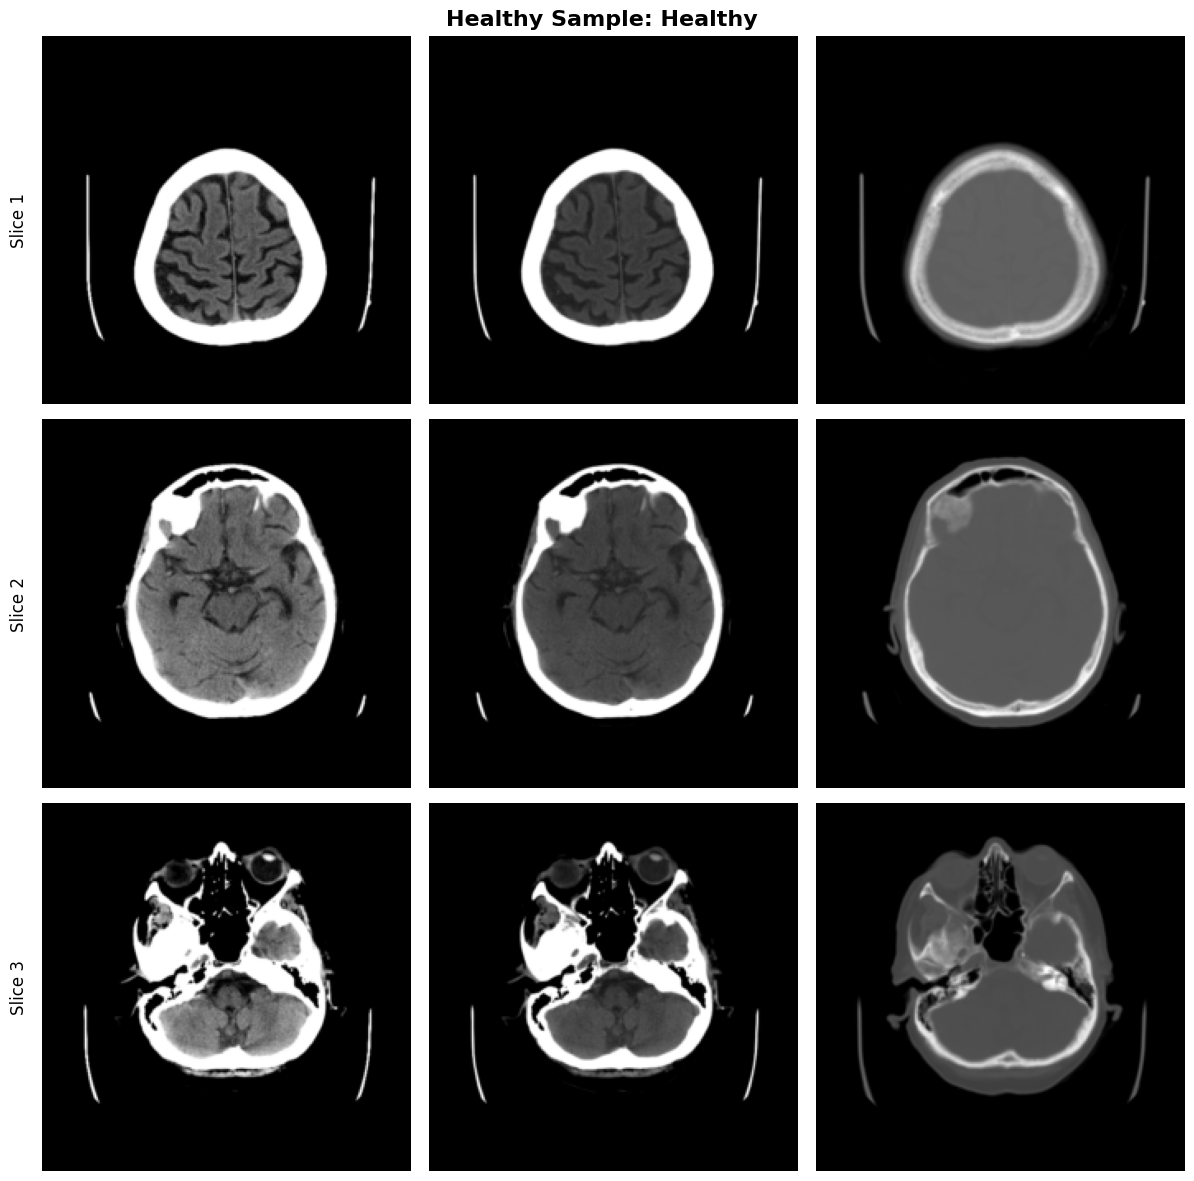

In [4]:
# Visualize the 9 channels (3 slices × 3 window presets)
def visualize_sample(dataset, idx, title="Sample"):
    image, label = dataset[idx]
    
    # image shape: (9, 224, 224)
    fig, axes = plt.subplots(3, 3, figsize=(12, 12))
    
    for slice_idx in range(3):
        for window_idx in range(3):
            channel_idx = slice_idx * 3 + window_idx
            ax = axes[slice_idx, window_idx]
            ax.imshow(image[channel_idx], cmap='gray')
            ax.axis('off')
            
            # Add titles
            if window_idx == 0:
                ax.text(-20, 112, f'Slice {slice_idx + 1}', 
                       rotation=90, va='center', fontsize=12)
    
    # Add overall title with label
    label_str = ', '.join([class_names[i] for i, val in enumerate(label) if val == 1])
    if not label_str:
        label_str = 'Healthy'
    
    fig.suptitle(f'{title}: {label_str}', fontsize=16, fontweight='bold', y=0.98)
    plt.tight_layout()
    plt.show()

# Visualize a healthy sample
if 'healthy' in samples_to_show:
    visualize_sample(train_dataset, samples_to_show['healthy'], "Healthy Sample")


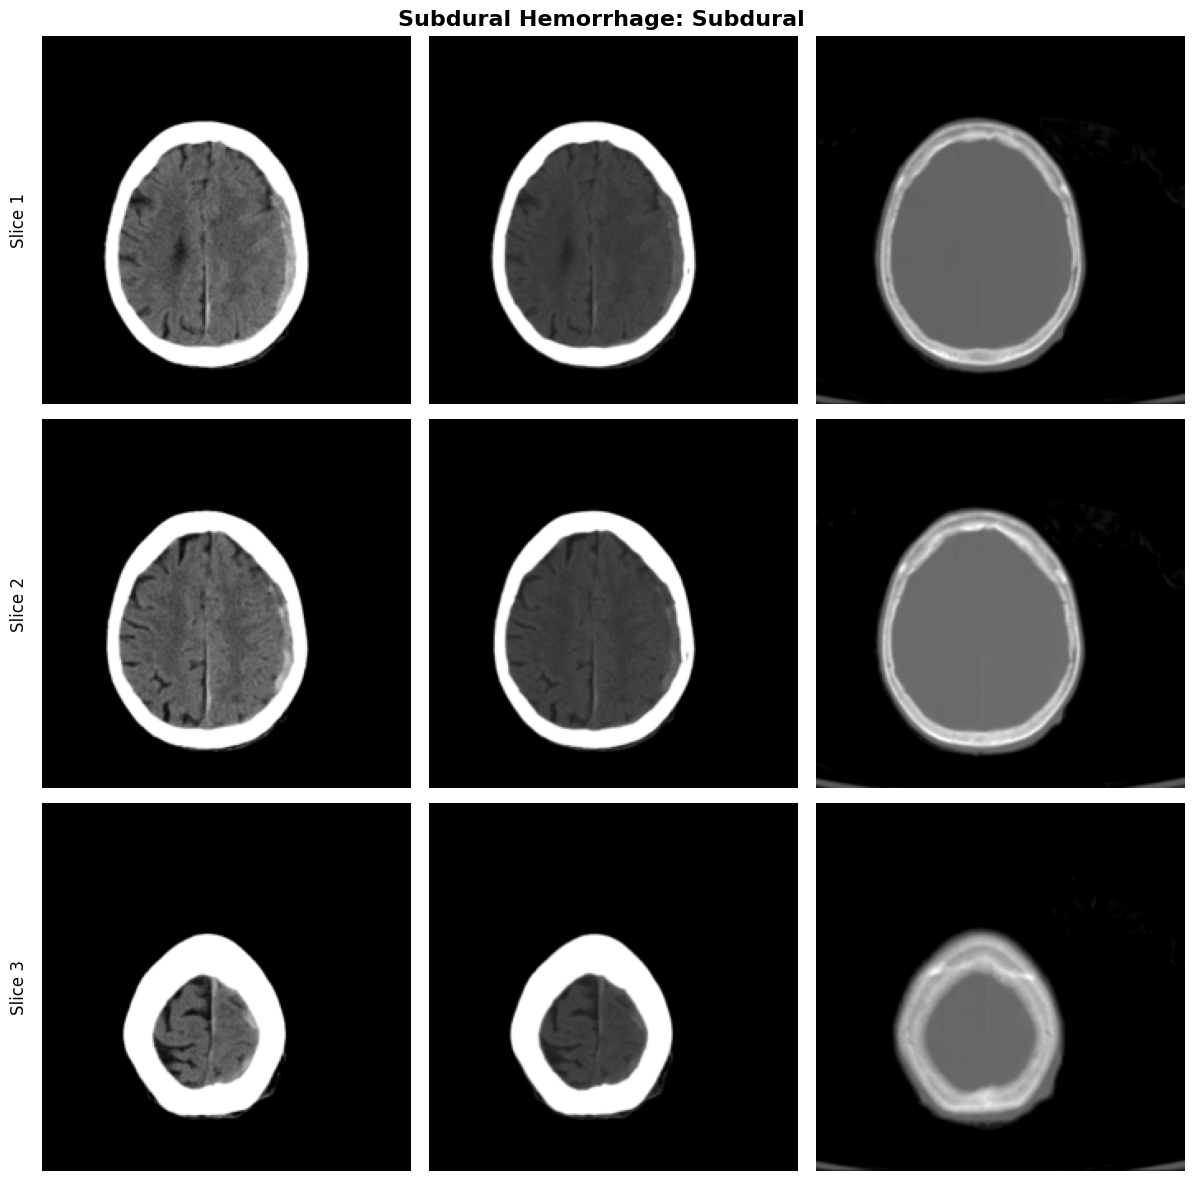

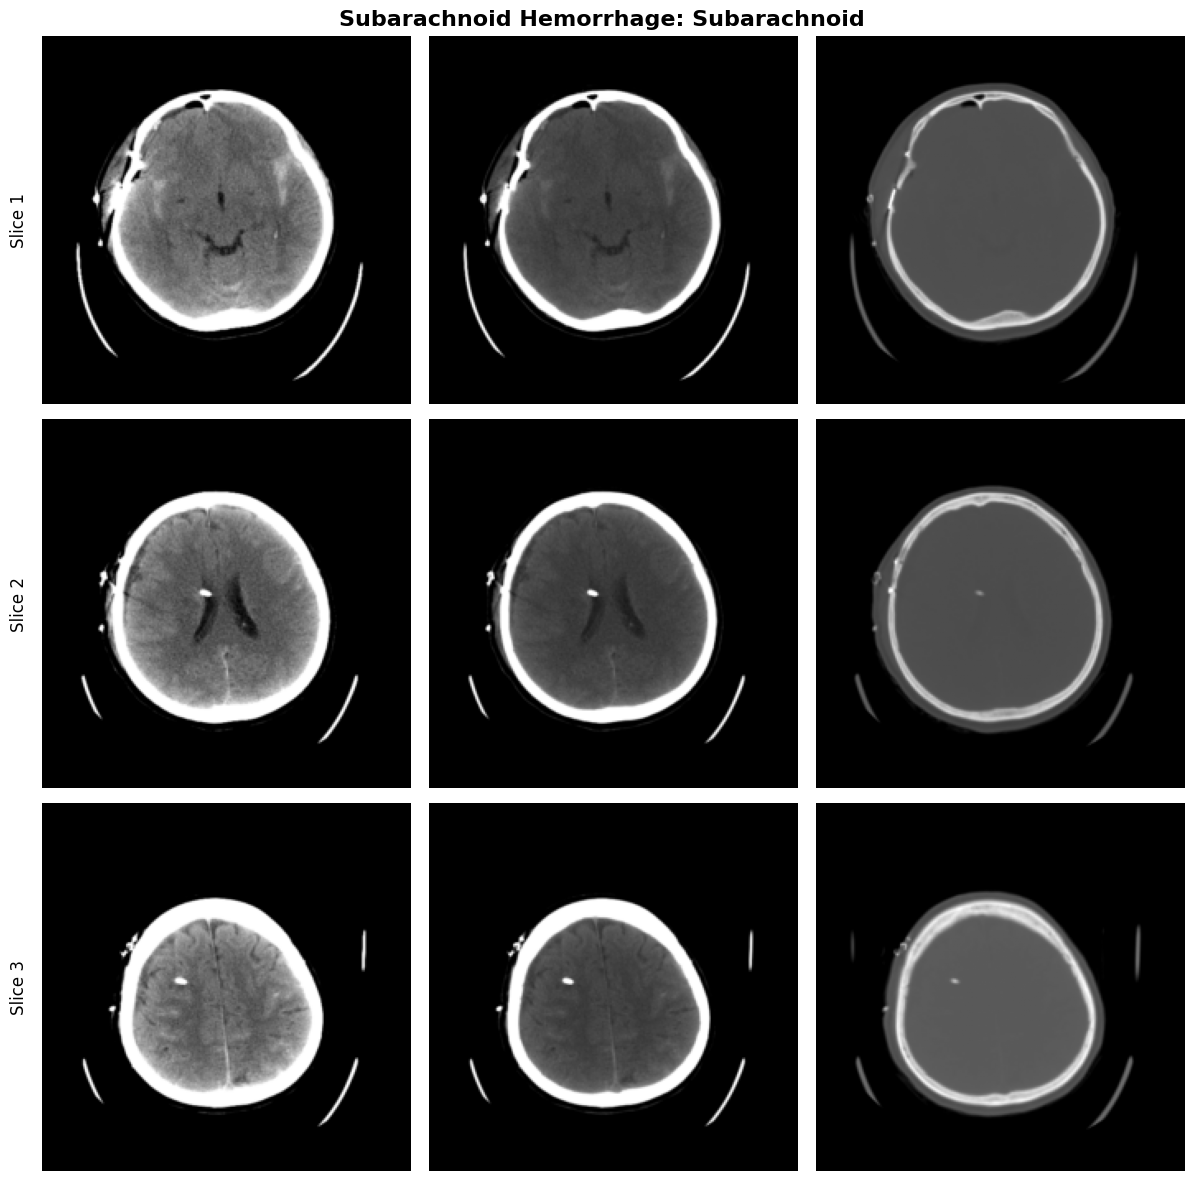

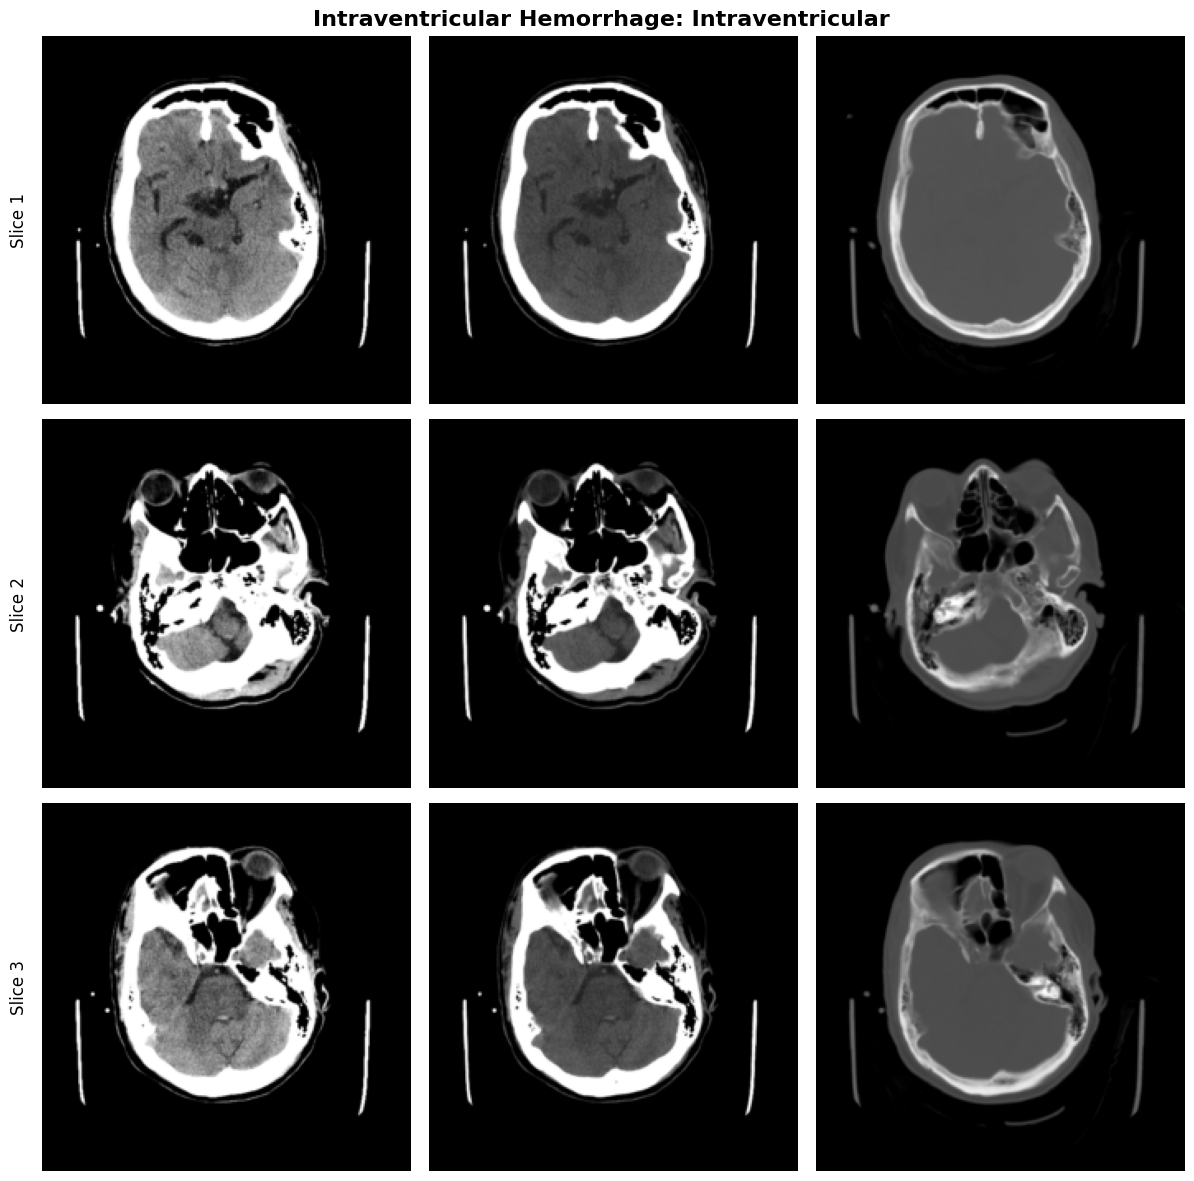

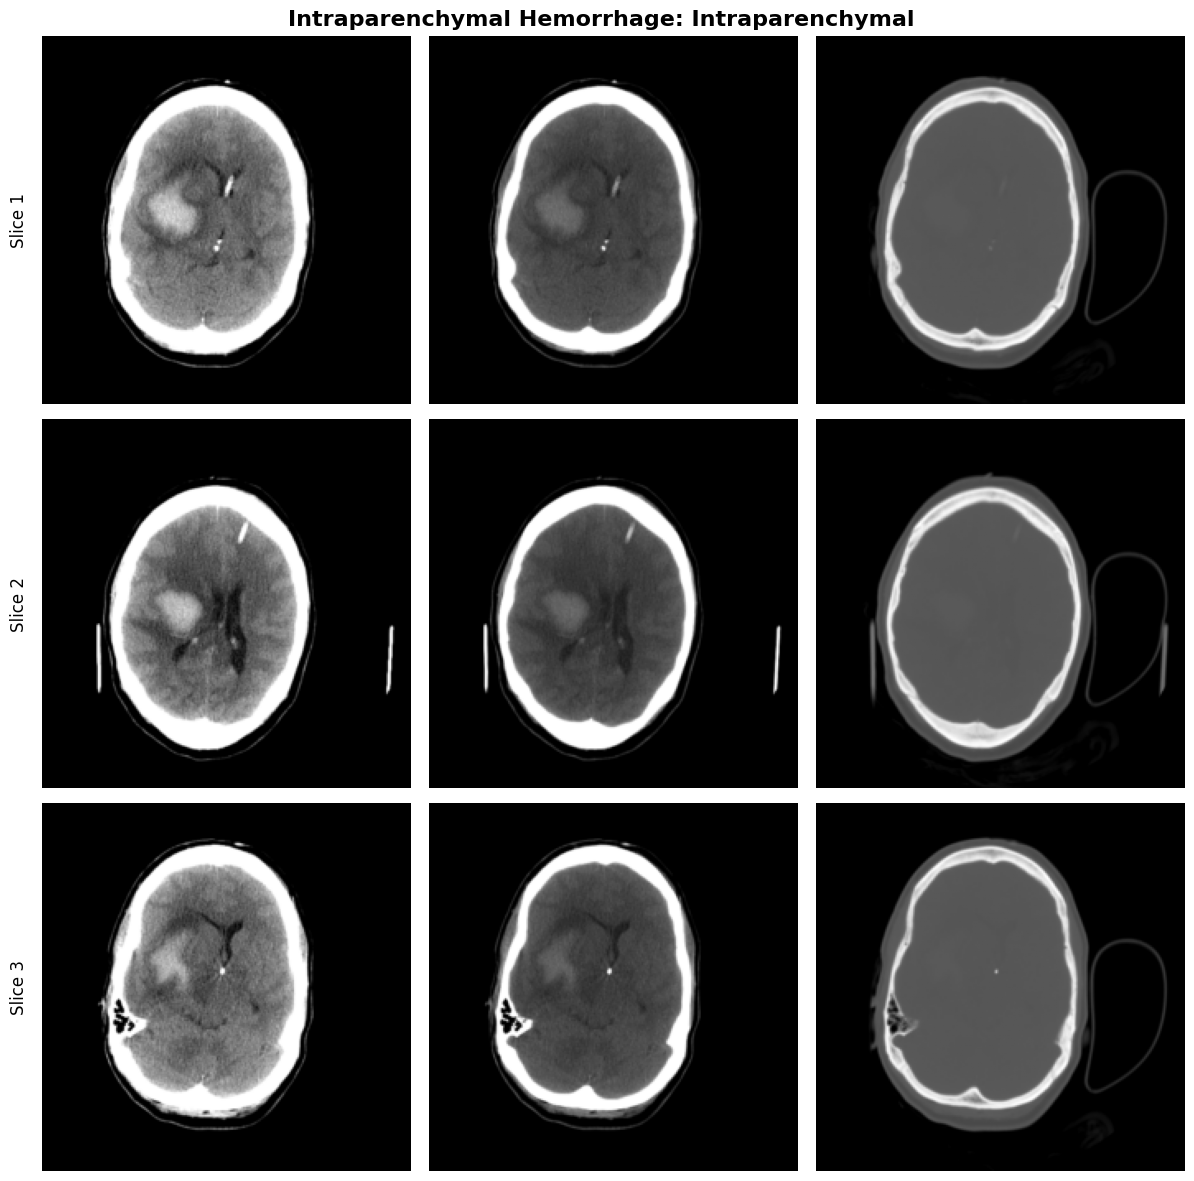

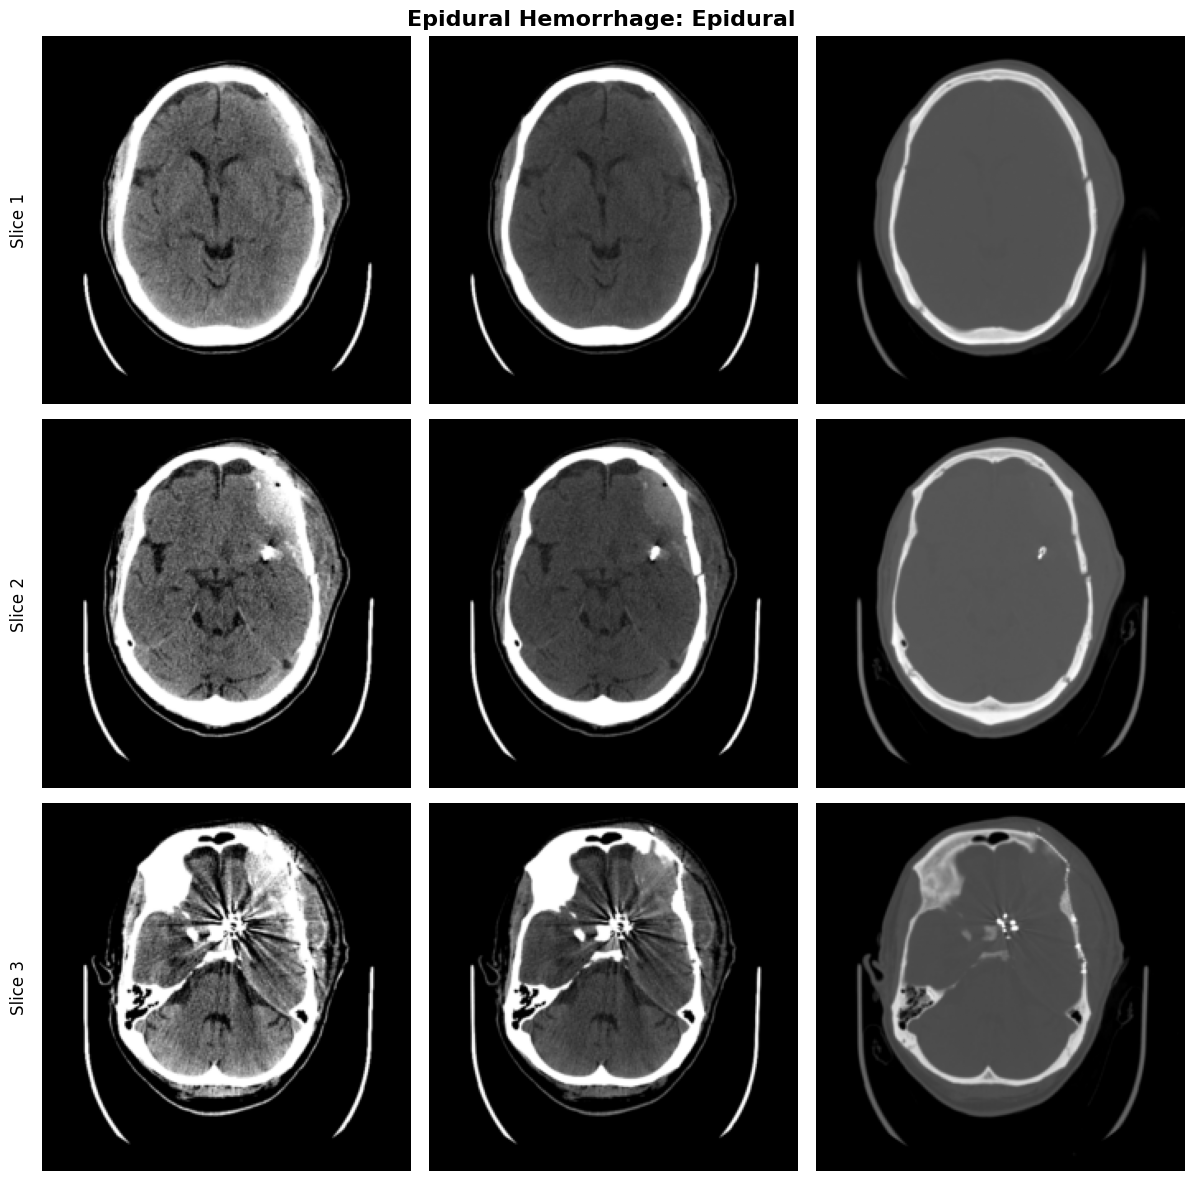

In [5]:
for class_type, idx in samples_to_show.items():
    if class_type != 'healthy':
        visualize_sample(train_dataset, idx, f"{class_type.capitalize()} Hemorrhage")
